# Grideye Cubicle Data
*Kernel > Restart & Run All*

In [1]:
# Imports
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import seaborn as sns

In [300]:
# my imports
from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm
tqdm.pandas()

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
#notify if cell is finished for cells taking longer than 30 seconds
%autonotify -a 30

<IPython.core.display.Javascript object>

In [2]:
# Loading the JSON data from the file
with open("betterTransitionlessData.json", "r") as jsonFile:
    jsonList = json.load(jsonFile)

### Creating the dataframes
There are 3 different dataframes that have been made for accessing the data easily, in whichever format works best for you.

 - **cubicleData_allInfo** has all of the information, including the states, and has the temperature arrays structured in a way that represents how they are physically recorded.
 
 - **cubicleData_essentialInfo_structured** has the temperature arrays structured like how they're physically recorded, and has the states of each row (i.e. either sitting, standing, or empty), but no other information.
 
 - **cubicleData_essentialInfo_flat** has each of the temperature values from the array flattened in order in seperate columns of the dataframe, as well as what the state of that entry is.

In [3]:
tempArrays = [entry["temps"] for entry in jsonList]
states = [entry["state"] for entry in jsonList]
names = [entry["name"] for entry in jsonList]
times = [entry["time"] for entry in jsonList]
    
cubicleData_allInfo = pd.DataFrame(data={"State": states, "TemperatureArray": tempArrays, "ID": names, "Time": times})
#print(cubicleData)
cubicleData_essentialInfo_structured = pd.DataFrame(data={"State": states, "TemperatureArray": tempArrays})

flatLists = []
for index in range(len(tempArrays)):
    arrayList = [states[index]]
    for subList in tempArrays[index]:
        arrayList.extend(subList)
    flatLists.append(arrayList)

cubicleData_essentialInfo_flat = pd.DataFrame(flatLists,columns = ["State"]+list(range(64)))

Here are some examples of how the dataframes are structured:

In [4]:
print("cubicleData_allInfo")
cubicleData_allInfo.sample(10)

cubicleData_allInfo


,State,TemperatureArray,ID,Time
4864,sitting,"[[23.75, 23.5, 22.5, 22.5, 23.0, 23.25, 23.0, ...",human_6,1.545095e+09
4270,standing,"[[24.25, 23.75, 22.5, 22.75, 23.5, 23.75, 23.0...",human_3,1.545112e+09
2411,sitting,"[[23.5, 23.0, 21.5, 22.25, 22.25, 23.0, 23.25,...",human_4,1.545106e+09
562,sitting,"[[23.25, 24.0, 23.0, 22.5, 23.25, 23.25, 23.25...",human_2,1.545107e+09
3627,sitting,"[[23.75, 23.25, 21.5, 22.75, 22.25, 23.25, 23....",human_4,1.545106e+09
1788,sitting,"[[23.0, 22.75, 22.25, 22.0, 22.0, 22.75, 22.0,...",human_4,1.545106e+09
5314,standing,"[[22.75, 23.25, 22.25, 22.25, 22.25, 23.0, 23....",human_1,1.545113e+09
4099,standing,"[[23.75, 23.25, 22.25, 22.5, 23.25, 23.5, 23.7...",human_4,1.545106e+09
1876,sitting,"[[23.5, 23.5, 21.75, 23.25, 23.0, 24.0, 23.0, ...",human_5,1.545095e+09
4087,empty,"[[23.5, 23.25, 22.25, 23.0, 22.5, 22.75, 23.0,...",human_0,1.545094e+09


In [5]:
print("cubicleData_essentialInfo_structured")
cubicleData_essentialInfo_structured.sample(10)

cubicleData_essentialInfo_structured


,State,TemperatureArray
4746,empty,"[[22.75, 23.0, 22.25, 22.25, 22.75, 22.75, 22...."
1057,empty,"[[23.5, 23.75, 22.5, 23.0, 22.5, 23.5, 23.25, ..."
1866,sitting,"[[24.0, 23.25, 21.75, 22.5, 22.25, 23.5, 23.25..."
689,standing,"[[23.25, 22.75, 21.5, 21.5, 21.25, 22.25, 22.7..."
368,standing,"[[24.25, 23.75, 22.5, 23.0, 23.0, 23.0, 23.75,..."
2388,empty,"[[23.25, 23.5, 22.0, 22.75, 22.5, 23.0, 23.25,..."
3537,sitting,"[[24.0, 22.75, 22.5, 22.5, 22.25, 23.25, 23.75..."
2155,sitting,"[[23.75, 23.25, 22.5, 22.75, 23.0, 23.5, 23.0,..."
4406,empty,"[[23.75, 23.25, 22.25, 22.5, 22.25, 22.75, 22...."
4403,sitting,"[[24.0, 23.75, 22.0, 23.0, 22.5, 23.25, 22.75,..."


In [6]:
print("cubicleData_essentialInfo_flat")
cubicleData_essentialInfo_flat.sample(10)

cubicleData_essentialInfo_flat


,State,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
1056,sitting,23.50,24.00,22.75,22.75,23.75,23.00,23.25,22.75,24.25,...,24.50,24.50,25.25,24.25,24.50,24.50,25.25,24.25,24.50,24.50
2418,standing,23.25,23.00,22.00,22.25,22.25,22.75,23.00,22.50,23.50,...,24.00,23.50,22.50,23.25,24.00,26.25,26.50,24.25,23.75,23.50
4349,standing,23.50,23.25,22.50,22.75,23.00,22.75,23.25,22.50,24.50,...,24.50,24.00,24.00,24.25,25.25,28.00,27.00,24.50,25.25,23.50
1984,sitting,24.25,24.00,22.50,22.75,23.00,23.25,23.00,22.75,23.25,...,24.00,23.25,23.25,24.25,24.25,24.75,24.75,23.75,25.00,24.50
3408,sitting,24.25,23.75,22.25,22.75,23.25,23.00,23.50,23.25,24.25,...,24.25,23.25,24.00,23.50,23.75,24.25,25.00,23.25,24.75,23.75
5113,sitting,22.75,23.75,22.25,22.25,23.00,22.75,22.75,23.00,23.00,...,24.00,24.25,23.25,23.25,23.75,24.25,24.00,24.25,24.25,24.50
1865,standing,24.00,23.75,22.50,23.50,22.50,23.50,23.25,22.50,24.25,...,24.25,24.00,24.50,24.50,25.25,26.75,27.25,24.75,24.50,24.00
2916,sitting,24.00,23.50,22.75,22.25,23.00,23.25,23.50,22.75,24.00,...,24.00,24.00,24.00,23.75,23.75,24.25,24.75,24.00,24.00,24.00
2682,empty,24.25,24.00,23.00,23.00,23.00,23.75,23.25,22.50,24.00,...,24.00,23.75,24.00,23.25,24.00,24.00,24.75,23.50,24.50,23.75
5089,empty,23.25,22.25,21.75,22.25,21.75,22.50,23.00,22.25,23.00,...,23.00,22.75,22.75,23.75,23.00,23.75,24.25,22.25,23.50,23.50


### Quickly exploring some of the data

Now that we've imported all of the data nicely, lets do a quick dive into somw of the characteristics of the data.

First off, we'll look at what the averages of each state look like.

In [7]:
def pixelStats(state=None, process="mean"):
    """
    Given a described state (e.g. "standing"), get the average of each of the pixel arrays
    of that state and visualise the result.
    """
    if state:
        if process == "mean":
            meanSeries = cubicleData_essentialInfo_flat[cubicleData_essentialInfo_flat["State"]==state] \
            .loc[:, cubicleData_essentialInfo_flat.columns != "State"].mean(0)
        elif process == "std":
            meanSeries = cubicleData_essentialInfo_flat[cubicleData_essentialInfo_flat["State"]==state] \
            .loc[:, cubicleData_essentialInfo_flat.columns != "State"].std(0)
        print(state.upper()[0] + state.lower()[1:] + " " + process)
    else:
        if process == "mean":
            meanSeries = cubicleData_essentialInfo_flat.loc[:, cubicleData_essentialInfo_flat.columns != "State"].mean(0)
        elif process == "std":
            meanSeries = cubicleData_essentialInfo_flat.loc[:, cubicleData_essentialInfo_flat.columns != "State"].std(0)
        print(process.upper()[0] + process.lower()[1:])
    pixelList = meanSeries.tolist()
    pixelArray = np.reshape(np.array(pixelList), (8,8))
    f, ax = plt.subplots(figsize=(9, 6))
    if process == "mean":
        sns.heatmap(pixelArray, annot=True, fmt='.4g', vmin=21, vmax=28, linewidths=0, ax=ax)
    elif process == "std":
        sns.heatmap(pixelArray, annot=True, fmt='.4g', vmin=0, vmax=1.8, cmap="winter", linewidths=0, ax=ax)

Regardless of what state the entry is in, here's what the average temperature for each pixel looks like:

Mean


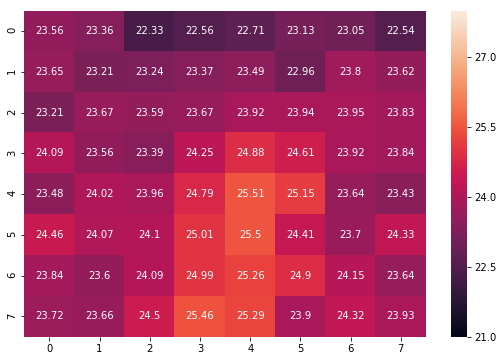

In [8]:
pixelStats(process="mean")

We can see that there's a lot of heat going on in the centre, especially down the bottom, with not much at all at the top.

Here's the data of the empty state:

Empty mean


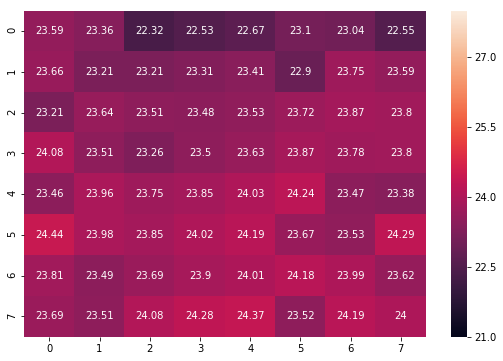

In [9]:
pixelStats("empty", "mean")

The data looks somewhat more homogenous, especially when taking into consideration the smaller heat range (approx 90-98).

Here's what the average heat of the standing & sitting positions look like:

Sitting mean


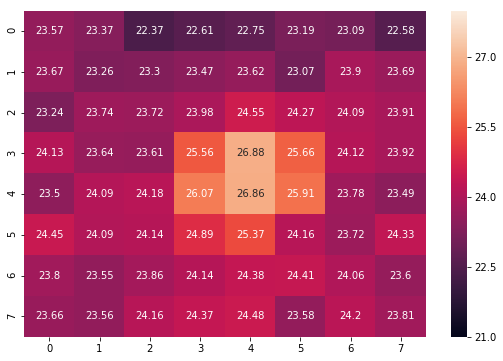

In [10]:
pixelStats("sitting", "mean")

Standing mean


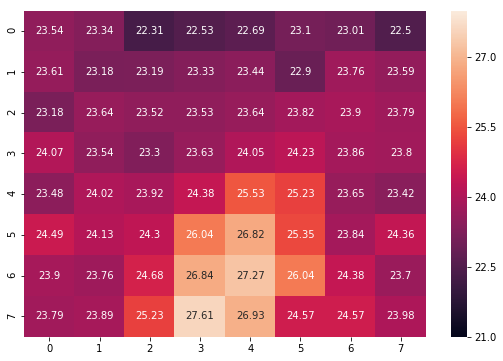

In [11]:
pixelStats("standing", "mean")

Both having much larger ranges, homogeneity is much less prevelant. Hopefully the distinction between the three states is enough for some easy classification!

Here's the standard deviation of each pixel regardless of state:

Std


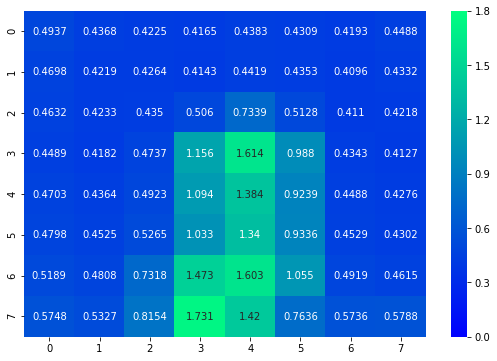

In [12]:
pixelStats(process="std")

With no one in it:

Empty std


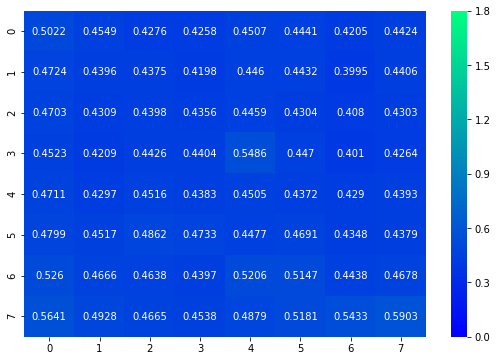

In [13]:
pixelStats("empty", "std")

While people are sitting down:

Sitting std


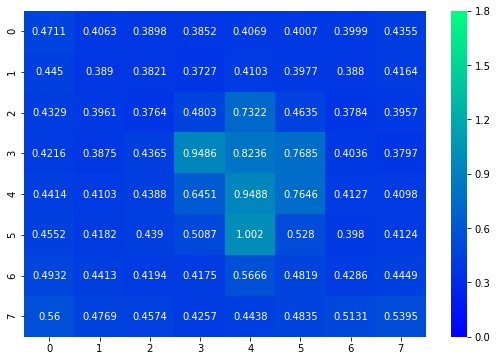

In [14]:
pixelStats("sitting", "std")

And while people are standing up:

Standing std


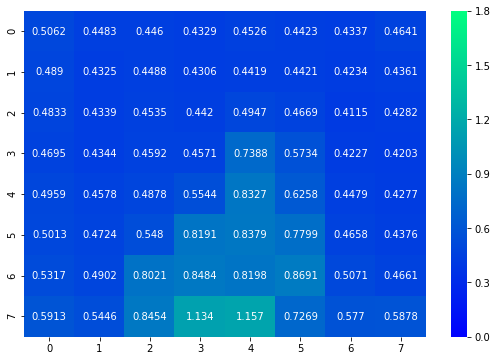

In [15]:
pixelStats("standing", "std")

The higher standard deviations overall seem to correlate with their high temperature counterparts, especially in the standard deviation map regardless of state. The low levels of standard deviation overall are promising for good data classification!

# Your Work:

We hope this helps you dive into the data and do your own investigations into how it could be classified. Have fun!

Dataframes:

 - cubicleData_allInfo
 
 - cubicleData_essentialInfo_structured
 
 - cubicleData_essentialInfo_flat

Goal classifications:

 - Empty
 
 - Standing
 
 - Sitting

In [16]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## split into train and test
X is the flatten data values and y is the labels 

In [241]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(np.array(cubicleData_essentialInfo_flat.loc[:, cubicleData_essentialInfo_flat.columns != "State"]),
                               np.array(cubicleData_essentialInfo_flat["State"]), test_size=0.9)
print(X_train.shape, y_train.shape)

(559, 64) (559,)


In [242]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [243]:
# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)

In [266]:
print("Classification report for classifier\n %s:\n\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):

             precision    recall  f1-score   support

      empty       0.78      1.00      0.87      1738
    sitting       1.00      0.82      0.90      1887
   standing       1.00      0.91      0.95      1912

avg / total       0.93      0.91      0.91      5537




0.9100595990608633

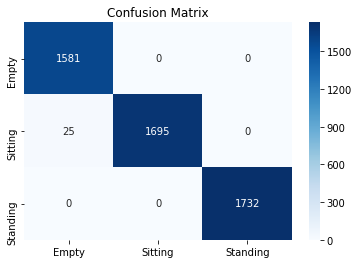

In [245]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), 
                  index=["Empty", "Sitting", "Standing"], 
                  columns=["Empty", "Sitting", "Standing"])

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g').set_title('Confusion Matrix');

In [269]:
print("Accuracy:\n\t{}".format(metrics.accuracy_score(y_test, y_pred)))

metrics.f1_score(y_test, y_pred, average=None)

Accuracy:
	0.683944374209861


C:\Users\aray\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.68595342, 0.99373041])

C:\Users\aray\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


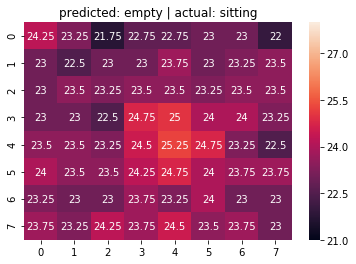

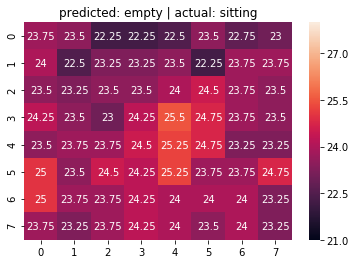

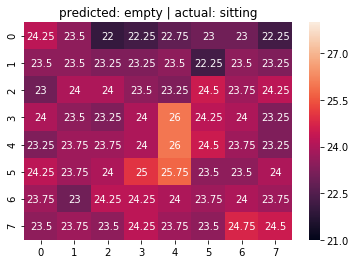

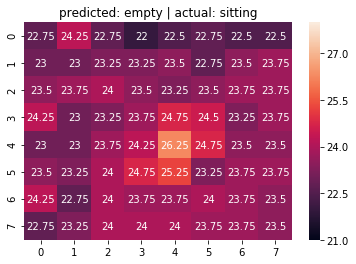

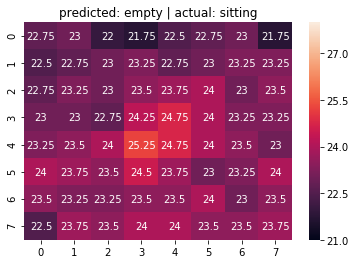

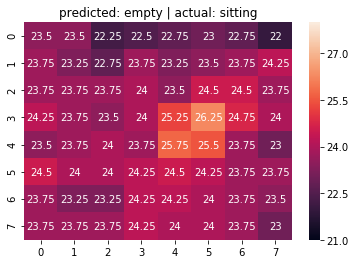

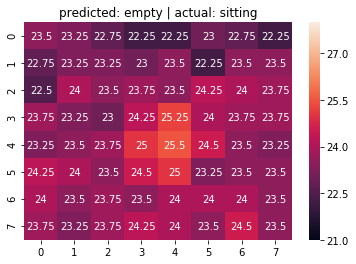

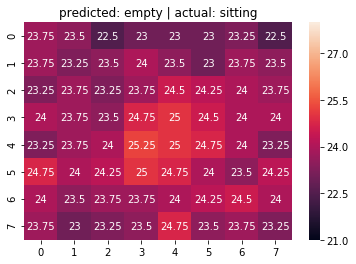

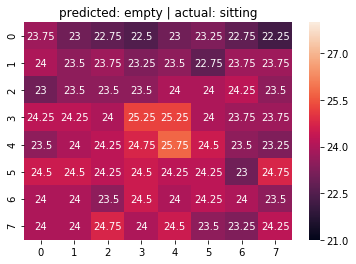

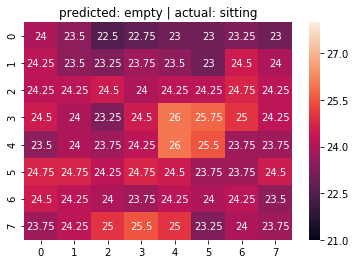

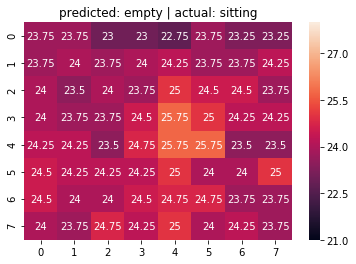

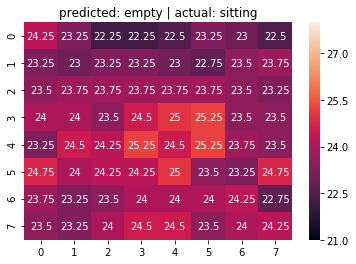

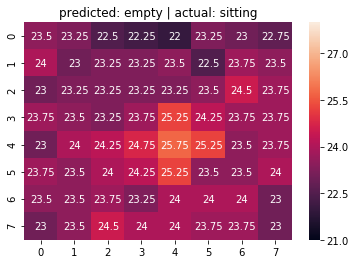

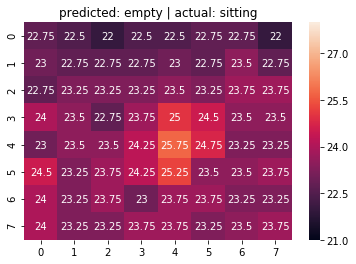

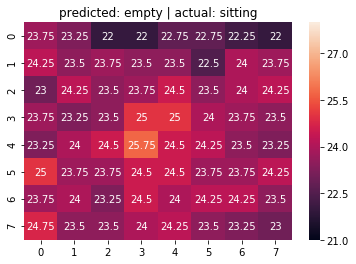

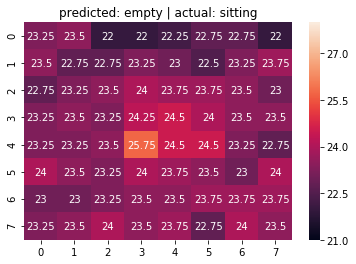

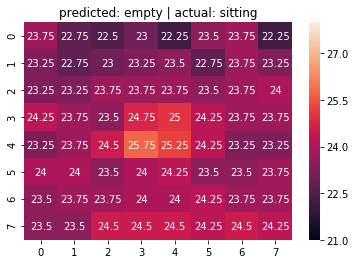

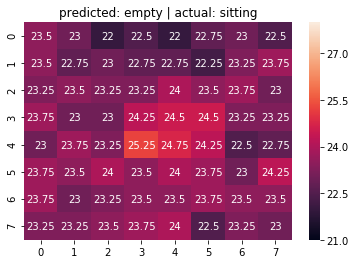

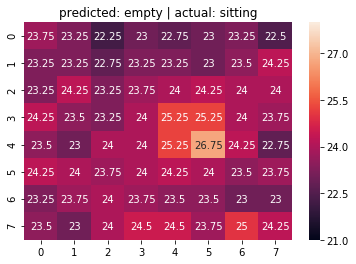

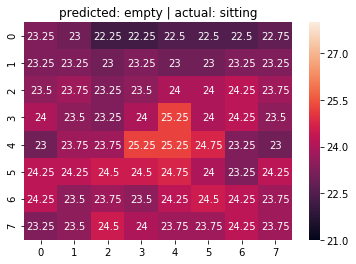

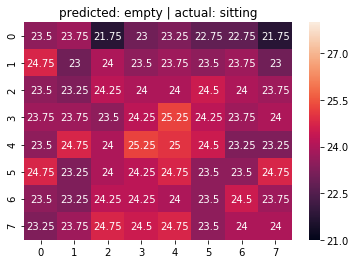

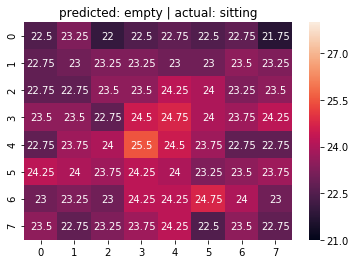

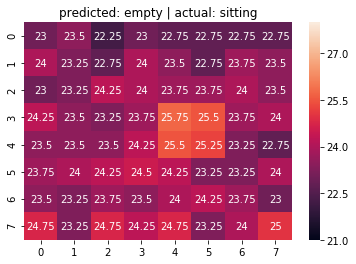

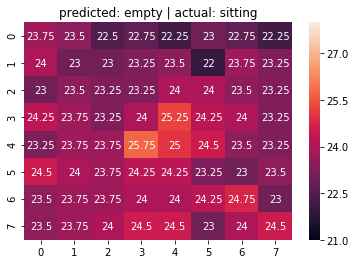

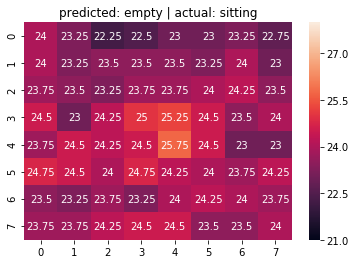

In [248]:
# predictions = clf.predict(inputs)
for test, pred, label in zip(X_test, y_pred, y_test):
  if pred != label:
    plt.figure()
    sns.heatmap(test.reshape((8,8)), annot=True, fmt='.4g', vmin=21, vmax=28).set_title("predicted: {} | actual: {}".format(pred, label))
    #print(test, 'has been classified as ', pred, 'and should be ', label) 


## plot data accuracy drop off given batch size

In [304]:
y_preds = []

for batch in tqdm(np.arange(0.85, 0.999, 0.001)):
    for batch_repeat in range(5):
        repeat_accuracy = []
        repeat_f1_empty = []
        repeat_f1_sitting = []
        repeat_f1_standing = []
        repeat_f1_total = []
        
        # Split arrays or matrices into random train and test subsets
        X_train, X_test, y_train, y_test = train_test_split(np.array(cubicleData_essentialInfo_flat.loc[:, cubicleData_essentialInfo_flat.columns != "State"]),
                                       np.array(cubicleData_essentialInfo_flat["State"]), test_size=batch)
        #print(X_train.shape, y_train.shape)

        # Create a classifier: a support vector classifier
        classifier = svm.SVC(gamma=0.001)
        #fit to the trainin data
        classifier.fit(X_train,y_train)

        # now to Now predict the value of the digit on the test data
        y_pred = classifier.predict(X_test)
        repeat_accuracy.append(metrics.accuracy_score(y_test, y_pred))
#         repeat_precision.append(metrics.precision_score(y_test, y_pred, average=None))
#         repeat_recall.append(metrics.recall_score(y_test, y_pred, average=None))
        
        class_f1_scores = metrics.f1_score(y_test, y_pred, average=None)
        f1_empty = class_f1_scores[0]
        f1_sitting = class_f1_scores[1]
        f1_standing = class_f1_scores[2]
        f1_total = np.mean(class_f1_scores)
        
        repeat_f1_empty.append(f1_empty)
        repeat_f1_sitting.append(f1_sitting)
        repeat_f1_standing.append(f1_standing)
        repeat_f1_total.append(f1_total)
                
    y_preds.append([batch, np.mean(repeat_accuracy), np.mean(repeat_f1_empty),
                    np.mean(repeat_f1_sitting), np.mean(repeat_f1_standing), np.mean(repeat_f1_total)])
    
prediction_batches = pd.DataFrame(y_preds,columns=["batch size","accuracy","empty_f1","sitting_f1","standing_f1","total_f1"])
prediction_batches.set_index("batch size", inplace=True)
prediction_batches

 92%|█████████▏| 138/150 [01:30<00:04,  2.61it/s]C:\Users\aray\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
 95%|█████████▍| 142/150 [01:31<00:02,  2.83it/s]C:\Users\aray\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
 95%|█████████▌| 143/150 [01:32<00:02,  2.91it/s]C:\Users\aray\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aray\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metri

,accuracy,empty_f1,sitting_f1,standing_f1,total_f1
batch size,,,,,
0.850,0.999159,0.998654,0.998782,1.000000,0.999145
0.851,0.999790,0.999664,0.999690,1.000000,0.999785
0.852,0.999790,0.999669,0.999689,1.000000,0.999786
0.853,0.998952,0.998302,0.998467,1.000000,0.998923
0.854,0.999791,0.999664,0.999692,1.000000,0.999785
0.855,0.999791,0.999667,0.999690,1.000000,0.999786
0.856,0.998538,0.997677,0.997857,1.000000,0.998511
0.857,0.999791,0.999671,0.999691,1.000000,0.999787
0.858,0.999792,0.999672,0.999694,1.000000,0.999789


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

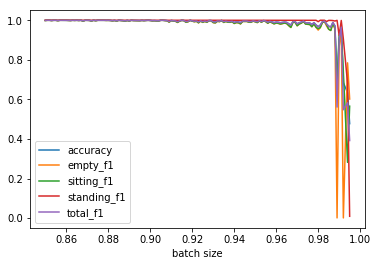

In [323]:
prediction_batches[(prediction_batches["empty_f1"] != 0) \
                   & (prediction_batches["sitting_f1"] != 0) \
                   & (prediction_batches["standing_f1"] != 0)].plot()

In [324]:
prediction_batches[(prediction_batches["empty_f1"] != 0) \
                   & (prediction_batches["sitting_f1"] != 0) \
                   & (prediction_batches["standing_f1"] != 0)]

,accuracy,empty_f1,sitting_f1,standing_f1,total_f1
batch size,,,,,
0.850,0.999159,0.998654,0.998782,1.000000,0.999145
0.851,0.999790,0.999664,0.999690,1.000000,0.999785
0.852,0.999790,0.999669,0.999689,1.000000,0.999786
0.853,0.998952,0.998302,0.998467,1.000000,0.998923
0.854,0.999791,0.999664,0.999692,1.000000,0.999785
0.855,0.999791,0.999667,0.999690,1.000000,0.999786
0.856,0.998538,0.997677,0.997857,1.000000,0.998511
0.857,0.999791,0.999671,0.999691,1.000000,0.999787
0.858,0.999792,0.999672,0.999694,1.000000,0.999789


In [333]:
prediction_batches = prediction_batches[(prediction_batches["empty_f1"] != 0) \
                   & (prediction_batches["sitting_f1"] != 0) \
                   & (prediction_batches["standing_f1"] != 0)]
prediction_batches = prediction_batches.reindex(np.arange(0.85, 0.999, 0.001))
prediction_batches = prediction_batches.interpolate()

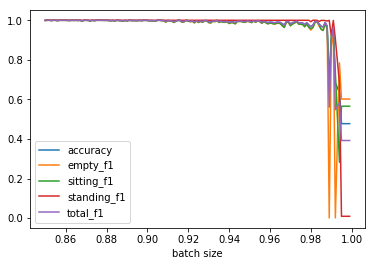

In [334]:
prediction_batches.plot()

In [335]:
prediction_batches

,accuracy,empty_f1,sitting_f1,standing_f1,total_f1
batch size,,,,,
0.850,0.999159,0.998654,0.998782,1.000000,0.999145
0.851,0.999790,0.999664,0.999690,1.000000,0.999785
0.852,0.999790,0.999669,0.999689,1.000000,0.999786
0.853,0.998952,0.998302,0.998467,1.000000,0.998923
0.854,0.999791,0.999664,0.999692,1.000000,0.999785
0.855,0.999791,0.999667,0.999690,1.000000,0.999786
0.856,0.998538,0.997677,0.997857,1.000000,0.998511
0.857,0.999791,0.999671,0.999691,1.000000,0.999787
0.858,0.999792,0.999672,0.999694,1.000000,0.999789
